In [1]:
import pandas as pd

data = pd.read_csv('data/mushrooms.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [10]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X = data.drop('class', axis=1)
y = data['class']

le = LabelEncoder()
X = X.apply(le.fit_transform)

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))

Score:  0.9766153846153847


In [15]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       843
           1       0.96      0.99      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



Get feature importance

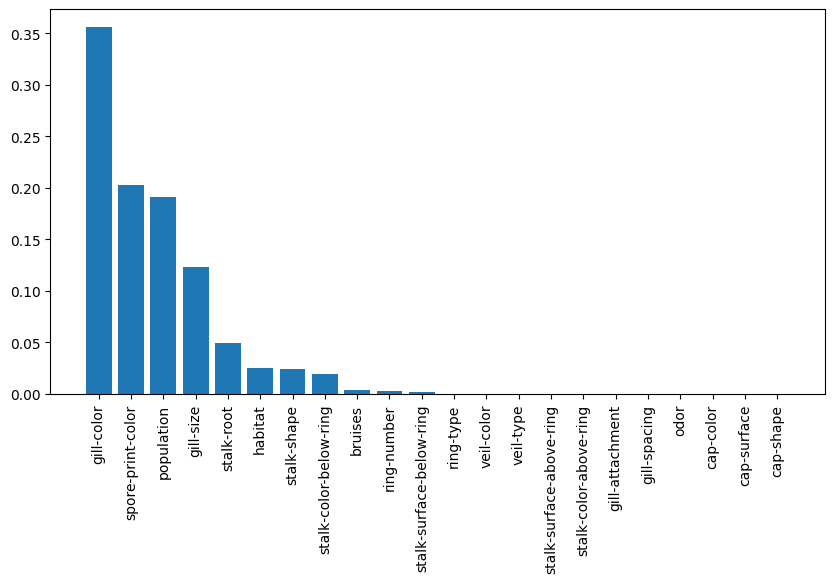

In [16]:
import matplotlib.pyplot as plt

# Get feature importances from our model
importances = model.feature_importances_
# Get the index of importances from greatest importance to least
sorted_index = importances.argsort()[::-1]
x = range(len(importances))

plt.figure(figsize=(10, 5))
plt.bar(x, importances[sorted_index], tick_label=X.columns[sorted_index])
plt.xticks(rotation=90)
plt.show()


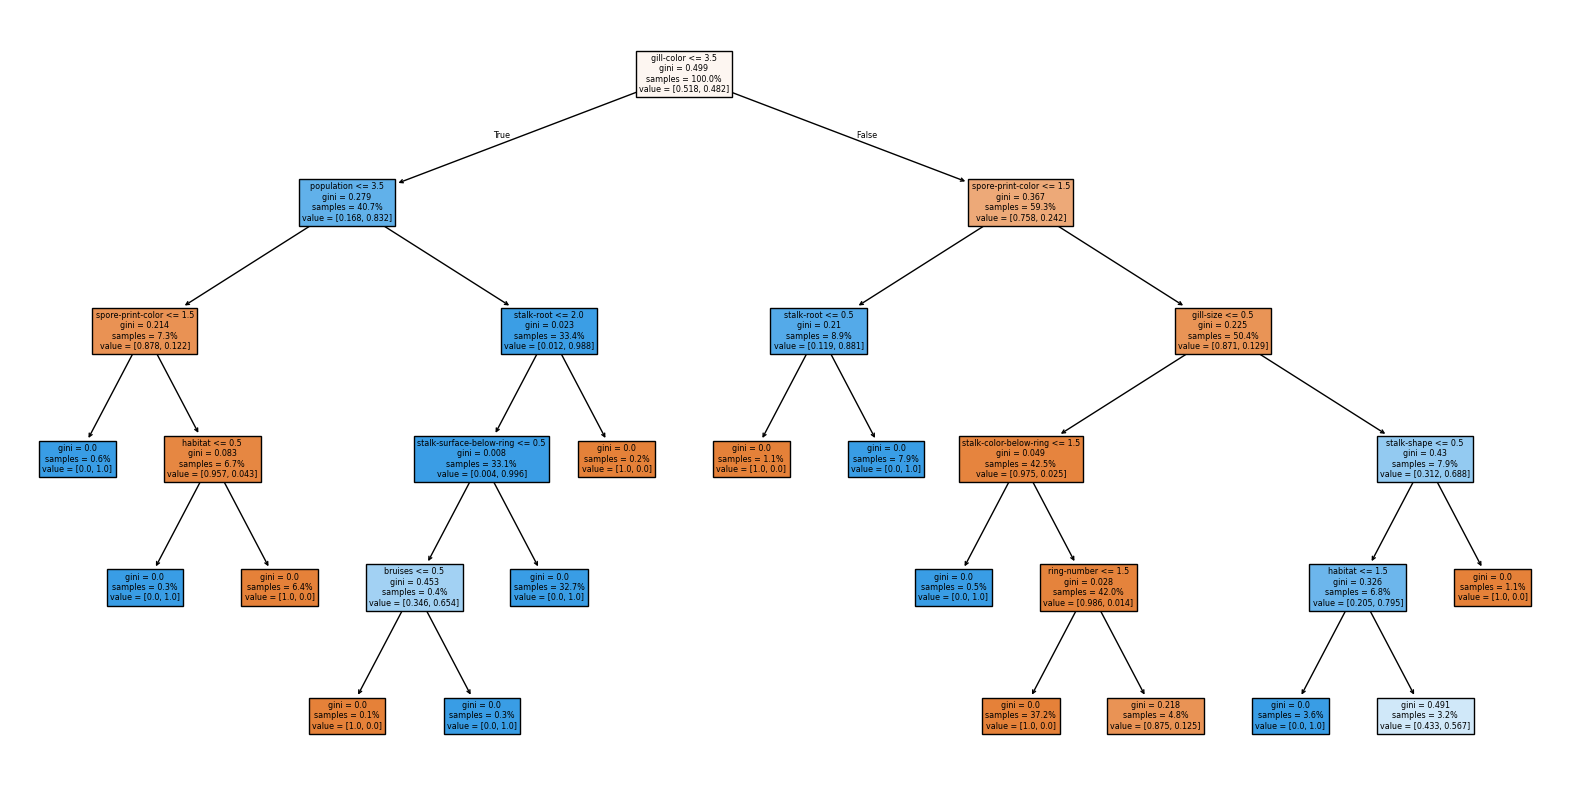

In [17]:
# Draw the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, proportion=True)
plt.show()

# Randomforest

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))


Score:  0.9815384615384616


In [23]:
model = RandomForestClassifier(n_estimators=3, max_depth=5, random_state=42, max_features=0.01)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))

Score:  0.9513846153846154


# Heart Attack Prediction

In [24]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

data = pd.read_csv(f"{path}/heart.csv")
data.info()

100%|██████████| 8.56k/8.56k [00:00<00:00, 2.91MB/s]

Extracting files...
Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\fedesoriano\heart-failure-prediction\versions\1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


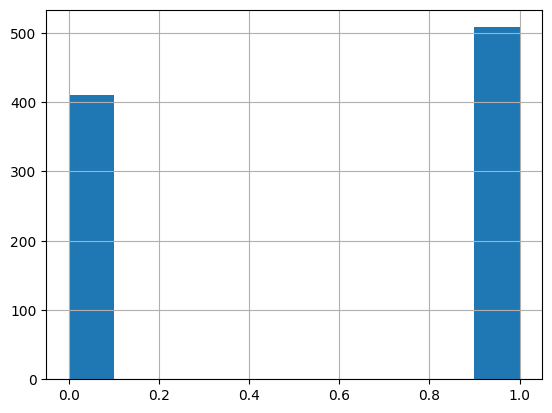

In [26]:
data['HeartDisease'].hist()
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

le = LabelEncoder()
X = X.apply(lambda x: le.fit_transform(x) if x.dtype == 'O' else x)

X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

model = DecisionTreeClassifier(max_depth=8, class_weight={0:1, 1:5}, random_state=42)
model.fit(x_train, y_train)

print("Score: ", model.score(x_test, y_test))
print(classification_report(y_test, model.predict(x_test)))

Score:  0.8369565217391305
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



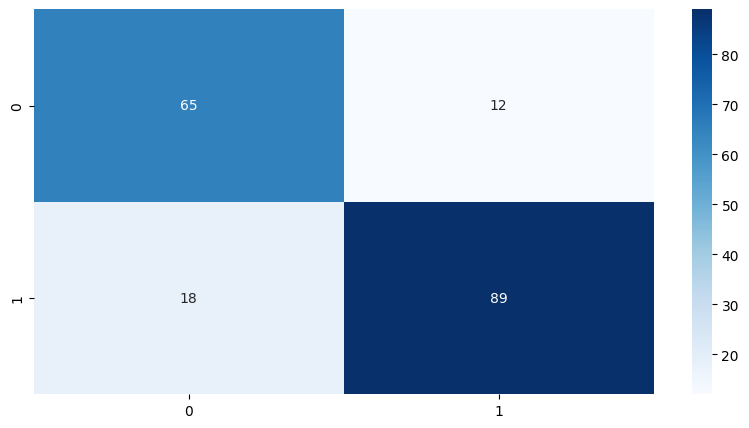

In [44]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, model.predict(x_test))
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

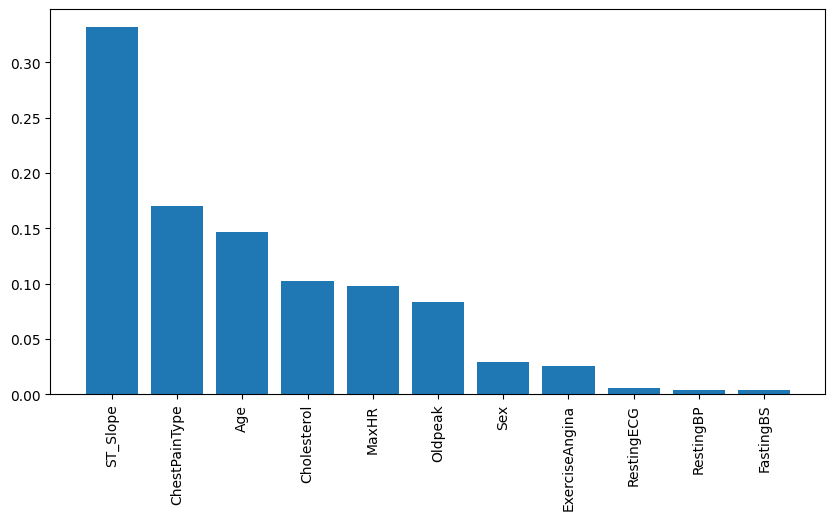

In [46]:
feature_importances = model.feature_importances_
sorted_index = feature_importances.argsort()[::-1]
x = range(len(feature_importances))

plt.figure(figsize=(10, 5))
plt.bar(x, feature_importances[sorted_index], tick_label=X.columns[sorted_index])
plt.xticks(rotation=90)
plt.show()